In [1]:
# import some functions
import env
import wrangle
import explore
# import libariess 
import pandas as pd
from fredapi import Fred
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# GDP based Wrangle
- This is data collection and cleaning will solely focus on the GDP based method to define the recession

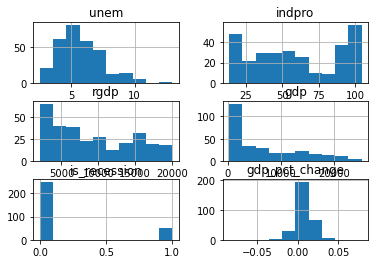

In [2]:
# Use the wrangle.py function to collect unemployment rate, 
# industrial production, real gdp, gdp, and recession dates.
gdp_based_df=wrangle.gdp_based()
gdp_based_df.hist()
# The data on unemployment is one of the declines in GDP that could lead to an increasing unemployment rate; 
# therefore, two consecutive declines in GDP would lead to a recession
# Industrial Production is the other key point that can be used to forecast the GDP 
# because the decline in the output of the key sector means a decline in the GDP
# Real GDP, which relects inflation
# GDP
# whether the National Bureau of Economic Research, 
# which is the independent research organization to announce whether the United Staes is in the Recession officially
plt.show()

In [3]:
# split the data into train, validate, and test for exploration purposes. 
# Since the index is time-based, the split will be by-time instead of random.
gdp_train,gdp_validate,gdp_test,gdp_train_val=wrangle.split_gdp_based(gdp_based_df)

In [4]:
# column is_recession, value 1 means there is recession ongoing, 0 means there is no recession ongoing.
gdp_train_val.tail()

,unem,indpro,rgdp,gdp,is_recession,gdp_pct_change
quarterly,,,,,,
2002-07-01,5.733333,90.698200,13531.741,10984.040,0.0,0.004035
2002-10-01,5.866667,90.654033,13549.421,11061.433,0.0,0.001307
2003-01-01,5.866667,91.215633,13619.434,11174.129,0.0,0.005167
2003-04-01,6.133333,90.516967,13741.107,11312.766,0.0,0.008934
2003-07-01,6.133333,91.117300,13970.157,11566.669,0.0,0.016669


## wrangle Key takeaway
- we have 223 quarters of data since 1948 for GDP-based data frame
- The real GDP growth rate increased from 2002Q1 after the recession; however, the unemployment rate was also rising
- Based on the natural rate of unemployment in 2003, based on the Congressional Budget Office, it should be 5%, which is above the health leave, and the recession is 0, which means there is no recession[^1]

# GDP based Exploration

#### Whether the GDP has a strong correlation with the recession?

<AxesSubplot:>

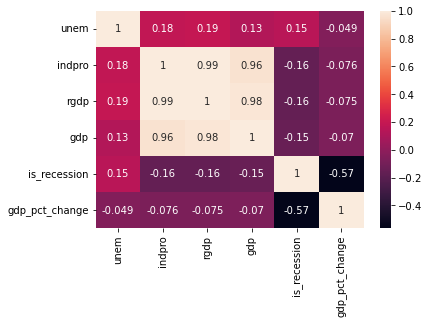

In [5]:
sns.heatmap(data=gdp_train_val.corr(),annot=True)

#### Take away
- The percentage change has an inverse correlation to recession.
- The correlation does not imply causation, but the causation is definite proof of correlation. Therefore, it is worth examining further.[^2]


####  Whether the GDP decline two consecutive quarters during the recession?

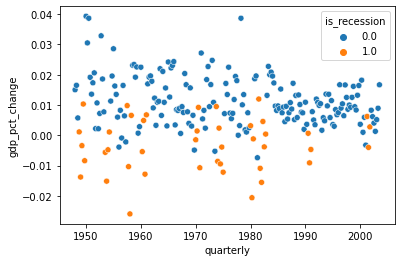

In [6]:
sns.scatterplot(data=gdp_train_val,x='quarterly',y='gdp_pct_change',hue='is_recession')
plt.show()

#### Key takeaway
- When there is no recession, we can see via the visualization that there is still a significant drop in the GDP(likely seasonal outcome), but it rarely drops below 0 pct_change
- When there is a recession, the pct_change drop below 0, most of which are located below 0.
- Based on the graph, some of them rarely are above zero, but there are positive GDP during the recession

#### Can the unem versus GDP reveal that the nation is in a recession?

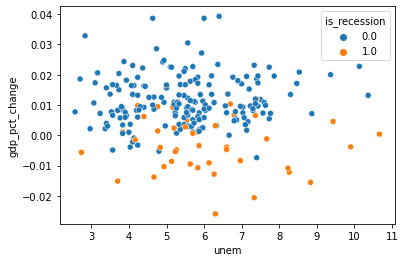

In [7]:
sns.scatterplot(data=gdp_train_val,x='unem',y='gdp_pct_change',hue='is_recession')
plt.show()

#### Key takeaway
- The graph showed a controversial phenomenon that the recession can push the unemployment rate to a high level, but it depicted that it is not the case.
- The graph also showed that the low unemployment rate could also means a recession

#### Hypothesis: Suppose the average two consecutive GDP in a recession is the same or greater than the average two consecutive GDP in no recession. In that case, the general definition of two consecutive declines in two consecutive GDP is false.
#### H0= The average two consecutive GDP in a recession is the same or less than the average two consecutive GDP in no recession
#### Ha= The average two consecutive GDP in a recession is the greater than the average two consecutive GDP in no recession
#### set alpha =0.05,(confidence level 95%)

In [8]:
gdp_train_val=gdp_train_val.resample('2Q').agg('sum')
gdp_train_val.is_recession=gdp_train_val.is_recession.replace(2,1)

recession GDP variance: 0.0002496265485829289
no recession GDP variance: 0.00015462278360142277
The average GDP in a recession is the same or less than the average GDP in no recession


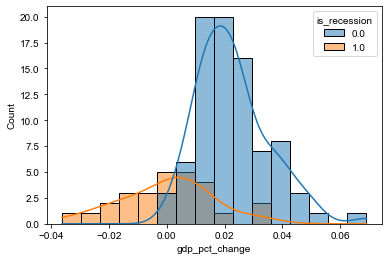

In [9]:
explore.hypo1(gdp_train_val)

### Key Takeaway
- The hypothesis test was based on the GDP percentage change, which concluded that the average GDP in a recession is the same or less than the average GDP in no recession. Suppose the average two consecutive GDP in a recession is the same or greater than the average two consecutive GDP in no recession. In that case, the general definition of two consecutive declines in two consecutive GDPs is false.

# GDP-based Exploration key takeaway
- In general, the data did show favor for two consecutive declines in GDP to call it a recession.
- The United States NBER used a different formula to call the recession; however, as noted in [README](https://github.com/QinzhiChen/individual_project), it could take a few months for NBER to announce it.
- The high unemployment rate doesn't mean there is a recession.
- The United States does not use the GDP-based formula to determine the recession, but an official determination came from NBER. Therefore, the hypothesis t-test can pass the null hypothesis.

# general data based Wrangle

In [10]:
#### Use general economy data such as CPI, money supply, Core CPI, GDP deflator,unemployment rate, industrial production, PCE to determine the recession.
#### The general belief came from a recent event that high inflation caused tight monetary policies, which is a general view that will cause a recession
#### This dataset is from some key inflation data, believed to be used for determining the federal interest rate.

In [11]:
gen_based=wrangle.gen_based()

In [12]:
gen_based

,cpi,moneysup,corecpi,gdp_def,unem,indpro,rgdp,gdp,rate,is_recession,gdp_pct_change
quarterly,,,,,,,,,,,
1959-01-01,28.993333,992.766667,29.933333,0.9,5.833333,22.410333,3123.978,510.330,2.570000,0.0,0.019196
1959-04-01,29.043333,1005.833333,30.100000,0.6,5.100000,23.497200,3194.429,522.653,3.083333,0.0,0.022552
1959-07-01,29.193333,1014.300000,30.233333,1.5,5.266667,22.536100,3196.683,525.034,3.576667,0.0,0.000706
1959-10-01,29.370000,1011.700000,30.433333,1.6,5.600000,22.643900,3205.790,528.600,3.990000,0.0,0.002849
1960-01-01,29.396667,1015.866667,30.566667,1.6,5.133333,24.009167,3277.847,542.648,3.933333,0.0,0.022477
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,268.760333,7564.233333,275.768667,6.4,5.900000,99.665133,19544.248,23046.934,0.070000,0.0,0.017070
2021-07-01,273.163333,7622.533333,279.372333,6.2,5.100000,100.519733,19672.594,23550.420,0.090000,0.0,0.006567
2021-10-01,278.413333,7660.433333,283.218000,6.8,4.233333,101.693300,20006.181,24349.121,0.080000,0.0,0.016957


# Footnote

[^1]: https://www.cbo.gov/sites/default/files/110th-congress-2007-2008/workingpaper/2007-06_0.pdf
[^2]: https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation#Usage,_and_meaning_of_'imply'